In [1]:
!pip install sodapy
!pip install plotly

In [3]:
import pandas as pd
import json
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'firefox'
chicago_areas = json.load(open("Boundaries - Community Areas (current).geojson", 'r'))
area_id_map = {}
for feature in chicago_areas['features']:
    feature['id'] = feature['properties']['area_numbe']
    area_id_map[feature['properties']['area_numbe']] = feature['id'];


In [21]:
# Snippet from: https://dev.socrata.com/foundry/data.cityofchicago.org/d62x-nvdr
from sodapy import Socrata
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# results returned as JSON from API / converted to Python list of
# dictionaries by sodapy.

from_2020 = "qzdf-xmn8"
from_2019 = "w98m-zvie"
from_2018 = "3i3m-jwuy"
from_2017 = "d62x-nvdr"
crimes = client.get(from_2020, limit=500)

# Convert to pandas DataFrame
crimes_df = pd.DataFrame.from_records(crimes)

# Population of Chicago 2020 = 2694240 

In [66]:
Homicide = crimes_df[crimes_df['primary_type'] == 'HOMICIDE']
Homicide_lat = Homicide['latitude']
Homicide_lon = Homicide['longitude']
Homicide_loc = list(zip(Homicide_lat, Homicide_lon))
 
crimes_2020_df = crimes_df
crime_type = []
time = []
dates = crimes_2020_df['date']
primary_type = crimes_2020_df['primary_type']
for date in dates:
    time.append(date.split('T')[1])
    
print(crimes_df)




                        date district                      block  \
0    2020-11-09T23:50:00.000      020         021XX W FOSTER AVE   
1    2020-11-09T23:50:00.000      004   091XX S STONY ISLAND AVE   
2    2020-11-09T23:47:00.000      002         034XX S RHODES AVE   
3    2020-11-09T23:45:00.000      015        049XX W CHICAGO AVE   
4    2020-11-09T23:43:00.000      010       016XX S ST LOUIS AVE   
..                       ...      ...                        ...   
495  2020-11-09T03:46:00.000      024           014XX W LUNT AVE   
496  2020-11-09T03:35:00.000      012      012XX W WASHBURNE AVE   
497  2020-11-09T03:30:00.000      006  085XX S COTTAGE GROVE AVE   
498  2020-11-09T03:23:00.000      019        010XX W BELMONT AVE   
499  2020-11-09T03:20:00.000      020         027XX W GREGORY ST   

                       description     location_description  \
0                   FORCIBLE ENTRY  SCHOOL - PUBLIC GROUNDS   
1    UNLAWFUL POSSESSION - HANDGUN              GAS STATI

In [7]:
# Separate nonviolent from violent
violent =     ['BATTERY', 'ROBBERY', 'OFFENSE INVOLVING CHILDREN', 
               'INTERFERENCE WITH PUBLIC OFFICER', 'STALKING', 'KIDNAPPING', 
               'ARSON', 'CRIMINAL SEXUAL ASSAULT', 'SEX OFFENSE', 
               'CONCEALED CARRY LICENSE VIOLATION', 'INTIMIDATION', 'HOMICIDE' ]

# "non-violent" 
non_violent = ['BURGLARY', 'THEFT', 'CRIMINAL DAMAGE', 'NARCOTICS',
               'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 
               'PUBLIC PEACE VIOLATION', 'MOTOR VEHICLE THEFT', 'LIQUOR LAW VIOLATION', 
               'OBSCENITY', 'PROSTITUTION', 'PUBLIC INDECENCY']

grey_area = []

In [8]:
fig = px.choropleth(crimes_df, locations='id', geojson=chicago_areas, color="community_area")
fig.show()

Error: could not locate runnable browser

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("C:\\Users\\Tony\\Downloads\\Crimes_-_2001_to_Present.csv")

C:\Users\Tony\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [103]:
print(data['Primary Type'].unique())
print(data['Description'].unique())


['DECEPTIVE PRACTICE' 'CRIM SEXUAL ASSAULT' 'BURGLARY' 'THEFT'
 'OFFENSE INVOLVING CHILDREN' 'CRIMINAL DAMAGE' 'OTHER OFFENSE'
 'SEX OFFENSE' 'CRIMINAL SEXUAL ASSAULT' 'BATTERY' 'ASSAULT' 'NARCOTICS'
 'MOTOR VEHICLE THEFT' 'ROBBERY' 'CRIMINAL TRESPASS' 'WEAPONS VIOLATION'
 'OBSCENITY' 'LIQUOR LAW VIOLATION' 'PROSTITUTION' 'NON-CRIMINAL'
 'PUBLIC PEACE VIOLATION' 'INTIMIDATION' 'ARSON'
 'INTERFERENCE WITH PUBLIC OFFICER' 'GAMBLING' 'STALKING' 'KIDNAPPING'
 'OTHER NARCOTIC VIOLATION' 'CONCEALED CARRY LICENSE VIOLATION' 'HOMICIDE'
 'RITUALISM' 'HUMAN TRAFFICKING' 'PUBLIC INDECENCY' 'NON - CRIMINAL'
 'NON-CRIMINAL (SUBJECT SPECIFIED)' 'DOMESTIC VIOLENCE']
['FINANCIAL IDENTITY THEFT OVER $ 300' 'NON-AGGRAVATED' 'UNLAWFUL ENTRY'
 'OVER $500' 'CRIM SEX ABUSE BY FAM MEMBER'
 'AGG SEX ASSLT OF CHILD FAM MBR' 'TO PROPERTY'
 'HARASSMENT BY ELECTRONIC MEANS' '$500 AND UNDER'
 'AGG CRIM SEX ABUSE FAM MEMBER' 'CREDIT CARD FRAUD'
 'SEX ASSLT OF CHILD BY FAM MBR' 'FINANCIAL IDENTITY THEFT $300 AND UND

In [101]:
df = data[data['Latitude'].notna()]
df = df[df['Longitude'].notna()]
violent_crime = ['BATTERY', 'ASSAULT', 'ROBBERY', 'ARSON', 'HOMICIDE', 'DOMESTIC VIOLENCE']
sexual_crime = ['CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT', ]

In [5]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
63291,11665567,JC234307,04/10/2019 04:37:00 PM,102XX S VERNON AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,SCHOOL - PUBLIC BUILDING,False,False,...,9.0,49.0,17,1181051.0,1837225.0,2019,04/17/2020 03:50:24 PM,41.708589,-87.612583,"(41.708589, -87.612583094)"
63376,11667963,JC235212,04/12/2019 04:08:00 PM,032XX N KEELER AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,True,...,30.0,16.0,02,1147835.0,1921408.0,2019,10/02/2019 04:13:24 PM,41.940298,-87.732066,"(41.940297617, -87.732066473)"
63377,11667968,JC237058,04/19/2019 01:57:00 PM,002XX N LARAMIE AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,28.0,25.0,17,1141669.0,1901165.0,2019,03/18/2020 03:52:17 PM,41.884865,-87.755230,"(41.884865037, -87.755230327)"
63453,11668309,JC238187,04/25/2019 05:20:00 PM,108XX S DR MARTIN LUTHER KING JR DR,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,9.0,49.0,08B,1180832.0,1833222.0,2019,06/30/2019 03:56:27 PM,41.697609,-87.613508,"(41.697609261, -87.613507612)"
63857,11692179,JC261724,05/13/2019 05:26:00 PM,090XX S RACINE AVE,0560,ASSAULT,SIMPLE,STREET,False,False,...,21.0,73.0,08A,1169908.0,1844927.0,2019,06/30/2019 03:56:27 PM,41.729973,-87.653167,"(41.729973132, -87.653166753)"


In [6]:
print(df['Longitude'].min())

BBox = ((-87.7738,   -87.5658, 41.8096, 41.9653))

print(BBox)

-91.686565684
(-87.7738, -87.5658, 41.8096, 41.9653)


In [56]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

In [60]:
chicagoMap = plt.imread('D:\Classes\CSCE320\Project\ChicagoCrimeAnalysis\Location_map_Chicago.png')

fig, ax = plt.subplots(figsize = (8,7))

ax.scatter(df['Longitude'],df['Latitude'], zorder=1, alpha=0.2,c='b',s=10)


ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])



ax.imshow(chicagoMap, zorder=0, extent = BBox, aspect= 'equal')

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Classes\\CSCE320\\Project\\ChicagoCrimeAnalysis\\Location_map_Chicago.png'

In [25]:
from ipywidgets import IntSlider
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


[[ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ... 46.  0.  0.]
 [ 0.  0.  0. ... 33.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  2. ...  0.  0.  0.]
 [33.  0.  0. ...  0.  0.  0.]]


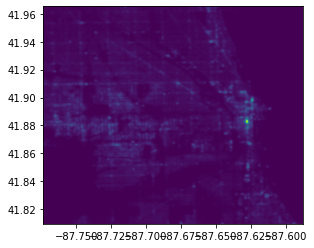

In [26]:
import numpy as np
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
%matplotlib inline

df = df[df['Latitude']>41.8096]
df = df[df['Latitude']<41.9653]
df = df[df['Longitude']>-87.7738]
df = df[df['Longitude']<-87.5658]

y = df.loc[:, 'Latitude'].tolist()
x = df.loc[:, 'Longitude'].tolist()

heatmap, xedges, yedges = np.histogram2d(x,y,bins=1000)
print(heatmap)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap = gaussian_filter(heatmap, sigma=4)

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

In [102]:


types = ['All']
types += data['Primary Type'].value_counts().index.tolist()



df['Month'] = df['Date'].apply(lambda x: int(x.split("/")[0]))
df['Day'] = df ['Date'].apply(lambda x: int(x.split("/")[1]))
df['Violent'] = df['Primary Type'].apply(lambda x: x in violent_crime)
print(df)

               ID Case Number                    Date  \
63291    11665567    JC234307  04/10/2019 04:37:00 PM   
63376    11667963    JC235212  04/12/2019 04:08:00 PM   
63377    11667968    JC237058  04/19/2019 01:57:00 PM   
63453    11668309    JC238187  04/25/2019 05:20:00 PM   
63857    11692179    JC261724  05/13/2019 05:26:00 PM   
...           ...         ...                     ...   
7221318   9999999    HY189683  03/18/2015 05:08:00 PM   
7221319  11700037    JC278815  05/26/2019 12:10:00 AM   
7221321  11700926    JC279725  05/26/2019 05:13:00 PM   
7221322     24560    JC279072  05/26/2019 06:48:00 AM   
7221325     24559    JC278908  05/26/2019 02:11:00 AM   

                                       Block  IUCR  \
63291                     102XX S VERNON AVE  1562   
63376                     032XX N KEELER AVE  1754   
63377                    002XX N LARAMIE AVE  1752   
63453    108XX S DR MARTIN LUTHER KING JR DR  0486   
63857                     090XX S RACINE AVE 

In [94]:
opt =[]
for i in range(2001,2021):
    opt.append(str(i))

In [88]:

optMonth = ['none']
optDay = ['none']
for i in range (1, 31):
    optDay.append(str(i))
    if (i < 13):
        optMonth.append(str(i))
    
typeDrop = widgets.Dropdown(
    options=types,
    value='All',
    description='Type:'
)

monthDrop = widgets.Dropdown (
    options= optMonth,
    value='none',
    description='Month:'
)

drop = widgets.Dropdown(
    options=opt,
    value='2019',
    description='Year:'
)

drop2 = widgets.Dropdown(
    options=opt,
    value='2020',
    description='Year:'
)


yr1 = drop
month = monthDrop
cmpr = widgets.Checkbox(description='Compare')
yr2 = drop2
ui = widgets.HBox([typeDrop, month, yr1, cmpr,yr2])

def f(typeOf, month, year1, compare, year2):
    
    dfYear = df[df['Year'] == int(year1)]
    
    if typeOf != 'All':
            dfYear = dfYear[dfYear['Primary Type'] == typeOf]
    if month != 'none':
            dfYear = dfYear[dfYear['Month'] == int(month)]

    crime_types = dfYear['Primary Type'].value_counts().index.tolist()
    crime_types_count = dfYear['Primary Type'].value_counts()
    
    title = year1 + " Type of Crime"
    
    if compare == True:

        title = year1 + " vs. " + year2+" Type of Crime"
        dfYear2 = df[df['Year'] == int(year2)]
        
        if typeOf != 'All':
            dfYear2 = dfYear2[dfYear2['Primary Type'] == typeOf]
            
        crime_types2 = dfYear2['Primary Type'].value_counts().index.tolist()
        crime_types_count2 = dfYear2['Primary Type'].value_counts()
        
        fig,ax = plt.subplots(figsize=(8,7))
        ax.set_title(title)
        ax.barh(crime_types,crime_types_count,color = 'b',label=year1)
        ax.barh(crime_types2,crime_types_count2,color = 'r',label=year2)
#         ax.set_xticks(rotation=0)
        ax.invert_yaxis()
        ax.legend(loc='lower right')
        plt.show()
    else:

        plt.figure(figsize=(8,7))
        plt.title(title)
        plt.barh(crime_types,crime_types_count)
        plt.xticks(rotation=0)
        plt.gca().invert_yaxis()
        for index, value in enumerate(crime_types_count):
            plt.text(value, index, str(value))
        plt.show()
    
#     if compare == True:
#         interact(f, year1=drop, compare=False,year2)

    
#interact(f, year=drop, compare=False)
out = widgets.interactive_output(f, {'typeOf': typeDrop, 'month': month, 'year1': yr1, 'compare' : cmpr, 'year2':yr2})


display(ui,out)

Output()

In [56]:
# Snippet from: https://dev.socrata.com/foundry/data.cityofchicago.org/d62x-nvdr
from sodapy import Socrata
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# results returned as JSON from API / converted to Python list of
# dictionaries by sodapy.



# Convert to pandas DataFrame
crimes_df = pd.DataFrame.from_records(crimes)

# Population of Chicago 2020 = 2694240

In [109]:

drop = widgets.Dropdown(
    options=opt,
    value='2019',
    description='Year:'
)
drop2 = widgets.Dropdown(
    options=optMonth,
    value='none',
    description='Month:'
)
drop3 = widgets.Dropdown(
    options=['yes', 'no', 'both'],
    value='both',
    description='Violent Crimes:'
)
year = drop
month = drop2
violent = drop3
ui = widgets.HBox([year, month, violent])

def f2(year, month, violent):
    dfYear = df[df['Year'] == int(year)]
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    if (violent == 'yes'):
        dfYear = dfYear[dfYear['Violent']]
    elif (violent == 'no'):
        dfYear = dfYear[dfYear['Violent'] == False]
        
    if (month == 'none') :
        count = []
        for i in range(1,13):
            dfMonth = dfYear[dfYear['Month'] == i]

    #     crime_types = dfMonth['Primary Type'].value_counts().index.tolist()
            total_count = sum(dfMonth['Primary Type'].value_counts().tolist())
            count.append(total_count)
        
        
        title = "total crime per month in " + year
        plt.figure(figsize=(8,7))
        plt.title(title)
        plt.barh(month_names,count)
        plt.xticks(rotation=0)
        plt.gca().invert_yaxis()
        for index, value in enumerate(count):
            plt.text(value, index, str(value))
        plt.show()
    else :
        dfMonth = dfYear[dfYear['Month'] == int(month)]
        bday = dfMonth['Day'].unique().max()
        count = []
        days = []
        for i in range(1, bday + 1):
            days.append(str(i))
            dfDay = dfMonth[dfMonth['Day'] == i]
            total_count = sum(dfDay['Primary Type'].value_counts().tolist())
            count.append(total_count)
        title = "total crime per day in " + month_names[int(month) - 1] + ", " +  year
        plt.figure(figsize=(10,12))
        plt.title(title)
        plt.barh(days,count)
        plt.xticks(rotation=0)
        plt.gca().invert_yaxis()
        for index, value in enumerate(count):
            plt.text(value, index, str(value))
        plt.show()

out = widgets.interactive_output(f2, {'year': year, 'month': month, 'violent': violent})
display(ui,out)


Output()

# Question: Can we predict what location most crime will happen in future years?
## Method: Clustering

In order for us to predict where crime will happen we will use a clustering algorithm called K means. 

We will use data from the years 2014 to 2018 to try and predict where crime will happen in future years. Then we will use the data from the year 2019 to see how accurate our model is. 

But first we need to find out what is the ideal number of clusters we should use for our clustering algorithm. For this we opted to use the silhouette method which measures how similar a point is to its own cluster compared to other cluster

# The Silhouette Method
As you can see below, the silhoutte method tells us that the most optimal number of clusters is 9. we should note that we used the data from 2018 only and that we only tested cluster sizes from 3 to 15 so there could be a more optimal number of clusters since the graph appears to be increasing towards the end, but due to time constrains and the silhoutte algorithm take a really long time to evaluate each cluster size, we have opted to just go with 9 clusters which is indicated by the "global" maximum.

Note: we only included a screenshot of the code since we ran it in another notebook and it took 2 hours to run so we didn't want to waste another 2 hours running it in this notebook

![title](sil.png)

# Clustering

In this section we run the k means clustering algorithm on a data set containing points for the years 2014 to 2018.

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

## Data cleaning

In [13]:
data = pd.read_csv("D:\Classes\CSCE320\Project\Crimes_-_2001_to_Present.csv")

df = data[data['Year'] < 2019]
df = df[df['Year'] > 2013]
df = df[df['Latitude'].notna()]
df = df[df['Longitude'].notna()]

df = df[df['Latitude'] > 40]
df = df[df['Longitude'] > -91]

latlon16To18 = df[['Latitude', 'Longitude']].copy()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Running Kmeans

In [14]:
kmeans = KMeans(n_clusters = 9).fit(latlon16To18)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])

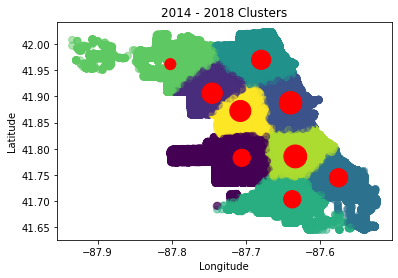

In [27]:
plt.scatter(latlon16To18['Longitude'], latlon16To18['Latitude'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', s=counts/400)
plt.title('2014 - 2018 Clusters')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

In [35]:
print("Counts per centroud: ",counts,"\n centorid coordinates", centroids)

Counts per centroud:  [119575 167088 201853 133504 148094 120786  49165 209249 177900] 
 centorid coordinates [[ 41.7824346  -87.7060526 ]
 [ 41.9060605  -87.74583147]
 [ 41.88770116 -87.6403326 ]
 [ 41.74432662 -87.57567268]
 [ 41.96995457 -87.67979708]
 [ 41.70325497 -87.63794773]
 [ 41.96169334 -87.80215379]
 [ 41.78517085 -87.63388883]
 [ 41.87212362 -87.70793415]]


# Clustering Results

As we can see, our clustering algorithm predicted that most of the crime will happen around longitude and latitude coordinates of (41.78517085, -87.63388883),  (41.88770116, -87.6403326), and (41.87212362. -87.70793415) in that order. This is evident by using the cluster centers and the amount of points that each cluster contains

# Evaluating our clusters

To evaluate how good our prediction is we will use the data of 2019 and run the same clustering algorithm and compare out prediction with the actual data of 2019. This should give us an idea of just how close we were to actually predicting future crime using past years.

## More data cleaning

In [17]:
df2 = data[data['Year'] == 2019]
df2 = df[df['Latitude'].notna()]
df2 = df[df['Longitude'].notna()]

df2 = df[df['Latitude'] > 40]
df2 = df[df['Longitude'] > -91]

latlon19 = df2[['Latitude', 'Longitude']].copy()

## Running Kmeans

In [18]:
kmeans2 = KMeans(n_clusters = 9).fit(latlon19)
centroids2 = kmeans2.cluster_centers_
labels2 = kmeans2.labels_
counts2 = np.bincount(labels2[labels2>=0])

In [34]:
print("Counts per centroud: ",counts2,"\n centorid coordinates", centroids2)

Counts per centroud:  [181682 209265 200952 119977 149577 120540  48521 163270 133430] 
 centorid coordinates [[ 41.8732188  -87.70809948]
 [ 41.78491081 -87.63389946]
 [ 41.88731398 -87.64007232]
 [ 41.78274463 -87.70596916]
 [ 41.96946616 -87.67997031]
 [ 41.70308788 -87.63792428]
 [ 41.96216377 -87.80260369]
 [ 41.90608327 -87.747082  ]
 [ 41.7443002  -87.57563783]]


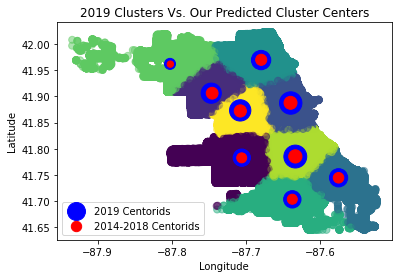

In [32]:
plt.scatter(latlon19['Longitude'], latlon19['Latitude'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids2[:, 1], centroids2[:, 0], c='blue', s=counts2/400, label='2019 Centorids')
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', s=counts/1200, label='2014-2018 Centorids')

plt.title('2019 Clusters Vs. Our Predicted Cluster Centers')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

plt.legend(loc='best')

plt.show()


# Results

Looking at the graph above we can see that our predicted cluster centers are not far off from the actual data from 2019. From the points we got from our first model we predicted that most crime will happen around **the interection of West Jackson Boulevard and South Dearborn Street**. Our 2019 model confirmed this to be the case since both values are only off by a little bit.

